<a href="https://colab.research.google.com/github/VarizkyNaldiba/ML_Ganjil_2025/blob/main/UTS_2341720243_VARIZKY_NALDIBA_RIMRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install annoy


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset medis untuk melihat pengelompokan pasien berdasarkan fitur kesehatan seperti tekanan darah, kolesterol, umur, dan lain-lain.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Kuliah/csv - csvan/UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### 1.	Penjelasan singkat dataset (jumlah sampel, fitur, tipe data).

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### 2.	Proses preprocessing (missing values, normalisasi, pembuatan fitur baru).

#### Missing Values

In [ ]:
data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


#### New Feature (Payment Ratio )

In [ ]:
data['Total_Bill'] = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
data['Total_Payment'] = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
data['Payment_Ratio'] = np.where(data['Total_Bill'] == 0, 0, data['Total_Payment'] / data['Total_Bill'])

display(data.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Total_Bill,Total_Payment,Payment_Ratio
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,0.089434
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,0.292791
2,3,90000.0,2,2,2,34,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,0.108388
3,4,50000.0,2,2,1,37,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,0.036259
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,0.540054



#### Standarisasi

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
display(data_scaled.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Total_Bill,Total_Payment,Payment_Ratio
0,-1.731993,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,...,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1.876378,-0.690692,-0.509027,-0.038002
1,-1.731878,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,...,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.876378,-0.665997,-0.438153,-0.011491
2,-1.731762,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,...,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.532942,-0.443170,-0.339216,-0.035531
3,-1.731647,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,...,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.532942,-0.101507,-0.382454,-0.044934
4,-1.731531,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,...,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.532942,-0.422920,0.450421,0.020743


### 3.	Hasil clustering KMeans dan DBSCAN


#### KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)

data_scaled['KMeans_Labels'] = kmeans_labels
display(data_scaled.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Total_Bill,Total_Payment,Payment_Ratio,KMeans_Labels
0,-1.731993,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,...,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1.876378,-0.690692,-0.509027,-0.038002,0
1,-1.731878,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,...,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.876378,-0.665997,-0.438153,-0.011491,0
2,-1.731762,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,...,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.532942,-0.443170,-0.339216,-0.035531,0
3,-1.731647,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,...,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.532942,-0.101507,-0.382454,-0.044934,0
4,-1.731531,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,...,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.532942,-0.422920,0.450421,0.020743,0


##### Silhouette Kmeans & Davies-Bouldin

In [ ]:
silhouette_kmeans = silhouette_score(data_scaled.drop('KMeans_Labels', axis=1), kmeans_labels)
print(f'Silhouette Score (KMeans): {silhouette_kmeans}')

davies_bouldin_kmeans = davies_bouldin_score(data_scaled.drop('KMeans_Labels', axis=1), kmeans_labels)
print(f'Davies-Bouldin Score (KMeans): {davies_bouldin_kmeans}')

Silhouette Score (KMeans): 0.16246553635436803
Davies-Bouldin Score (KMeans): 1.7934185551483621


##### Visualisasi

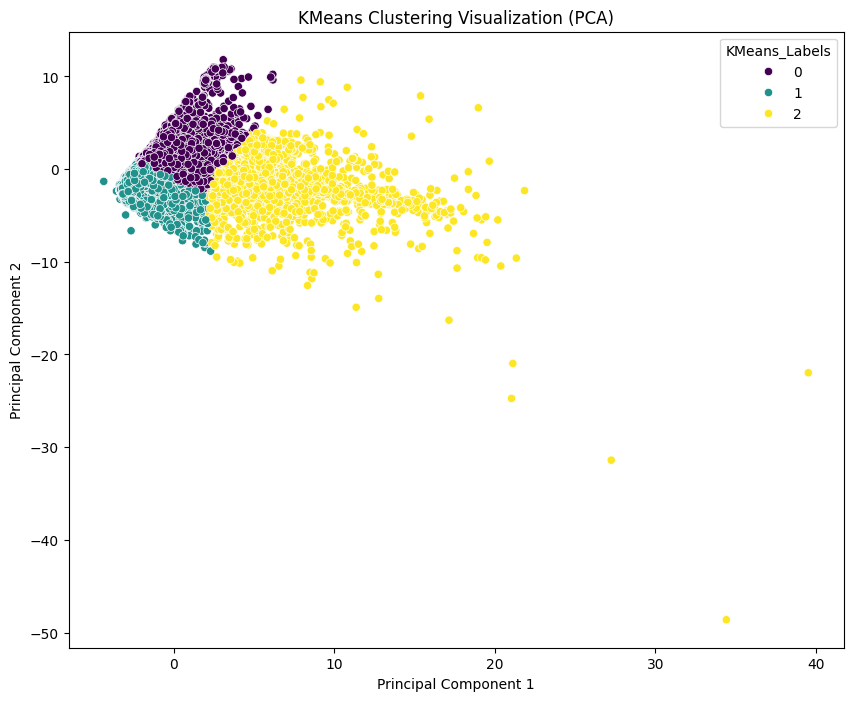

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled.drop('KMeans_Labels', axis=1))

data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca['KMeans_Labels'] = kmeans_labels

# Visualize KMeans clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Labels', data=data_pca, palette='viridis')
plt.title('KMeans Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### DBSCAN **tidak direkomendasikan untuk dataset ini karna
- Banyak fitur berbeda skala (misal LIMIT_BAL vs PAY_6)

- Distribusi sangat tidak merata (skewed), sebagian besar pelanggan punya tagihan dan pembayaran kecil, sebagian sangat besar.

- Data tidak punya batas cluster alami — karena ini data keuangan kontinu, bukan kategori.

In [ ]:
dbscan = DBSCAN(eps=1.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(data_scaled)

data_scaled['DBSCAN_Labels'] = dbscan_labels
display(data_scaled.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Total_Bill,Total_Payment,Payment_Ratio,KMeans_Labels,DBSCAN_Labels
0,-1.731993,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,...,-0.296801,-0.308063,-0.314136,-0.293382,1.876378,-0.690692,-0.509027,-0.038002,0,-1
1,-1.731878,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,...,-0.240005,-0.244230,-0.314136,-0.180878,1.876378,-0.665997,-0.438153,-0.011491,0,-1
2,-1.731762,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,...,-0.240005,-0.244230,-0.248683,-0.012122,-0.532942,-0.443170,-0.339216,-0.035531,0,0
3,-1.731647,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,...,-0.228645,-0.237846,-0.244166,-0.237130,-0.532942,-0.101507,-0.382454,-0.044934,0,1
4,-1.731531,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,...,0.271165,0.266434,-0.269039,-0.255187,-0.532942,-0.422920,0.450421,0.020743,0,-1


In [ ]:
unique_labels = np.unique(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

data_no_noise = data_scaled[data_scaled['DBSCAN_Labels'] != -1]
labels_no_noise = data_no_noise['DBSCAN_Labels']
features_no_noise = data_no_noise.drop(columns=['DBSCAN_Labels'])

# Hitung Silhouette Score
if n_clusters > 1:
    sil_score = silhouette_score(data_scaled.drop(columns=['KMeans_Labels', 'DBSCAN_Labels']), dbscan_labels)
    print(f"Silhouette Score (DBSCAN): {sil_score}")
else:
    sil_score = None
    print("Silhouette Score (DBSCAN): Not applicable (only one cluster or all noise)")

# Hitung Davies-Bouldin Score
if len(np.unique(labels_no_noise)) > 1 and len(labels_no_noise) > 0:
    db_score = davies_bouldin_score(features_no_noise, labels_no_noise)
    print(f"Davies-Bouldin Score (DBSCAN): {db_score}")
else:
    db_score = None
    print("Davies-Bouldin Score (DBSCAN): Not applicable (only one cluster or contains noise points)")

Silhouette Score (DBSCAN): -0.14728978572002707
Davies-Bouldin Score (DBSCAN): 1.8335898427372592


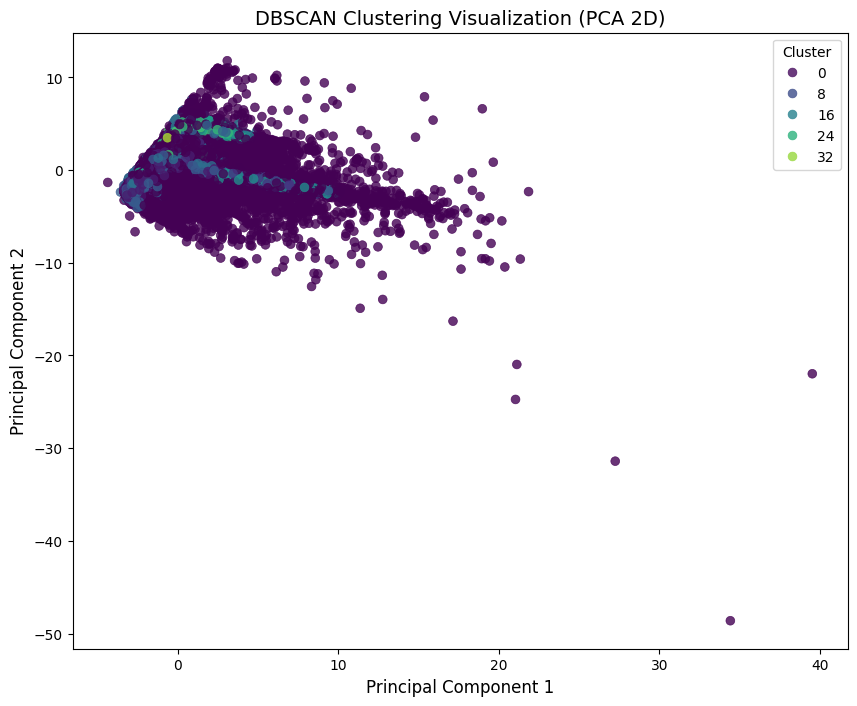

In [ ]:
pca = PCA(n_components=2, random_state=42)
data_pca_dbscan = pca.fit_transform(data_scaled.drop(columns=['KMeans_Labels', 'DBSCAN_Labels']))

data_pca_dbscan = pd.DataFrame(data_pca_dbscan, columns=['PCA1', 'PCA2'])
data_pca_dbscan['DBSCAN_Labels'] = dbscan_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='DBSCAN_Labels',
    data=data_pca_dbscan,
    palette='viridis',
    s=40,
    alpha=0.8,
    edgecolor=None
)
plt.title('DBSCAN Clustering Visualization (PCA 2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.show()

### 4. Implementasi Annoy

In [ ]:
n_features = data_scaled.drop(['KMeans_Labels', 'DBSCAN_Labels'], axis=1).shape[1]
annoy_index = AnnoyIndex(n_features, 'euclidean')

for i in range(data_scaled.shape[0]):
    annoy_index.add_item(i, data_scaled.drop(['KMeans_Labels', 'DBSCAN_Labels'], axis=1).iloc[i].tolist())

annoy_index.build(10)

query_point_index = 21
n_neighbors = 5

neighbors, distances = annoy_index.get_nns_by_item(query_point_index, n_neighbors, include_distances=True)

print(f"Query Point Index: {query_point_index}")
print("Nearest Neighbors and Distances:")

kmeans_labels = data_scaled['KMeans_Labels'].tolist()
for n, d in zip(neighbors, distances):
    print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {kmeans_labels[n]}")

Query Point Index: 21
Nearest Neighbors and Distances:
Neighbor Index: 21 | Distance: 0.0000 | Cluster (KMeans): 1
Neighbor Index: 1800 | Distance: 0.5803 | Cluster (KMeans): 1
Neighbor Index: 207 | Distance: 0.7715 | Cluster (KMeans): 1
Neighbor Index: 1223 | Distance: 0.7798 | Cluster (KMeans): 1
Neighbor Index: 4043 | Distance: 0.7825 | Cluster (KMeans): 1
